In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [22]:
original_image = cv2.imread("../images/tezja.jpeg")
img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# tsza gdzieś tu dorobić zmniejszanie obrazka bo dla takich dużcyh 4000x3000 długo mieli długo z 2,5 min

#noiseless_image = cv2.fastNlMeansDenoisingColored(original_image,None,30,30,21,41)

#noiseless_image = cv2.blur(original_image,(10,10)) #do wyjebania
#noiseless_image = cv2.GaussianBlur(original_image,(21,21),0) # gaus też spoko
noiseless_image = cv2.medianBlur(original_image, 15) # na razie top (default=15)
#noiseless_image = cv2.blur(original_image,(10,10)) # tu przetestować tego czwartego

vectorized = noiseless_image.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 17 # (default = 17)
attempts = 10
ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)

res = center[label.flatten()]
result_image = res.reshape((img.shape))

#noiseless_image_colored = cv2.fastNlMeansDenoisingColored(result_image,None,20,20,7,21)

result = cv2.imwrite('../images/tezja_medianblur3.jpg', result_image)


In [ ]:
plt.figure(figsize=(32,18))
plt.imshow(img)
plt.show()

In [ ]:
plt.figure(figsize=(32,18))
plt.imshow(result_image)
plt.show()

In [ ]:
plt.figure(figsize=(32,18))
plt.imshow(noiseless_image)
plt.show()

In [1]:
from skimage.morphology import skeletonize
import numpy as np

# Define your binary matrix
matrix = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0]
], dtype=bool)

# Apply skeletonization
skeleton = skeletonize(matrix)

print("Original Matrix:\n", matrix.astype(int))
print("Skeletonized Matrix:\n", skeleton.astype(int))
import numpy as np

# Define your binary matrix
matrix = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0]
], dtype=bool)

# Apply skeletonization
skeleton = skeletonize(matrix)

print("Original Matrix:\n", matrix.astype(int))
print("Skeletonized Matrix:\n", skeleton.astype(int))

Original Matrix:
 [[0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0]]
Skeletonized Matrix:
 [[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [3]:
result_image = cv2.imread("../scripts/col17.png")

In [23]:
# Borders
image_shape = result_image.shape
borders = np.zeros((image_shape[0], image_shape[1]))

# Vertical
for i in range(image_shape[0]):
    for j in range(image_shape[1] - 1):
        if not np.array_equal(result_image[i][j], result_image[i][j + 1]):
            borders[i][j] = 1

# Horizontal
for i in range(image_shape[0] - 1):
    for j in range(image_shape[1]):
        if not np.array_equal(result_image[i][j], result_image[i + 1][j]):
            borders[i][j] = 1

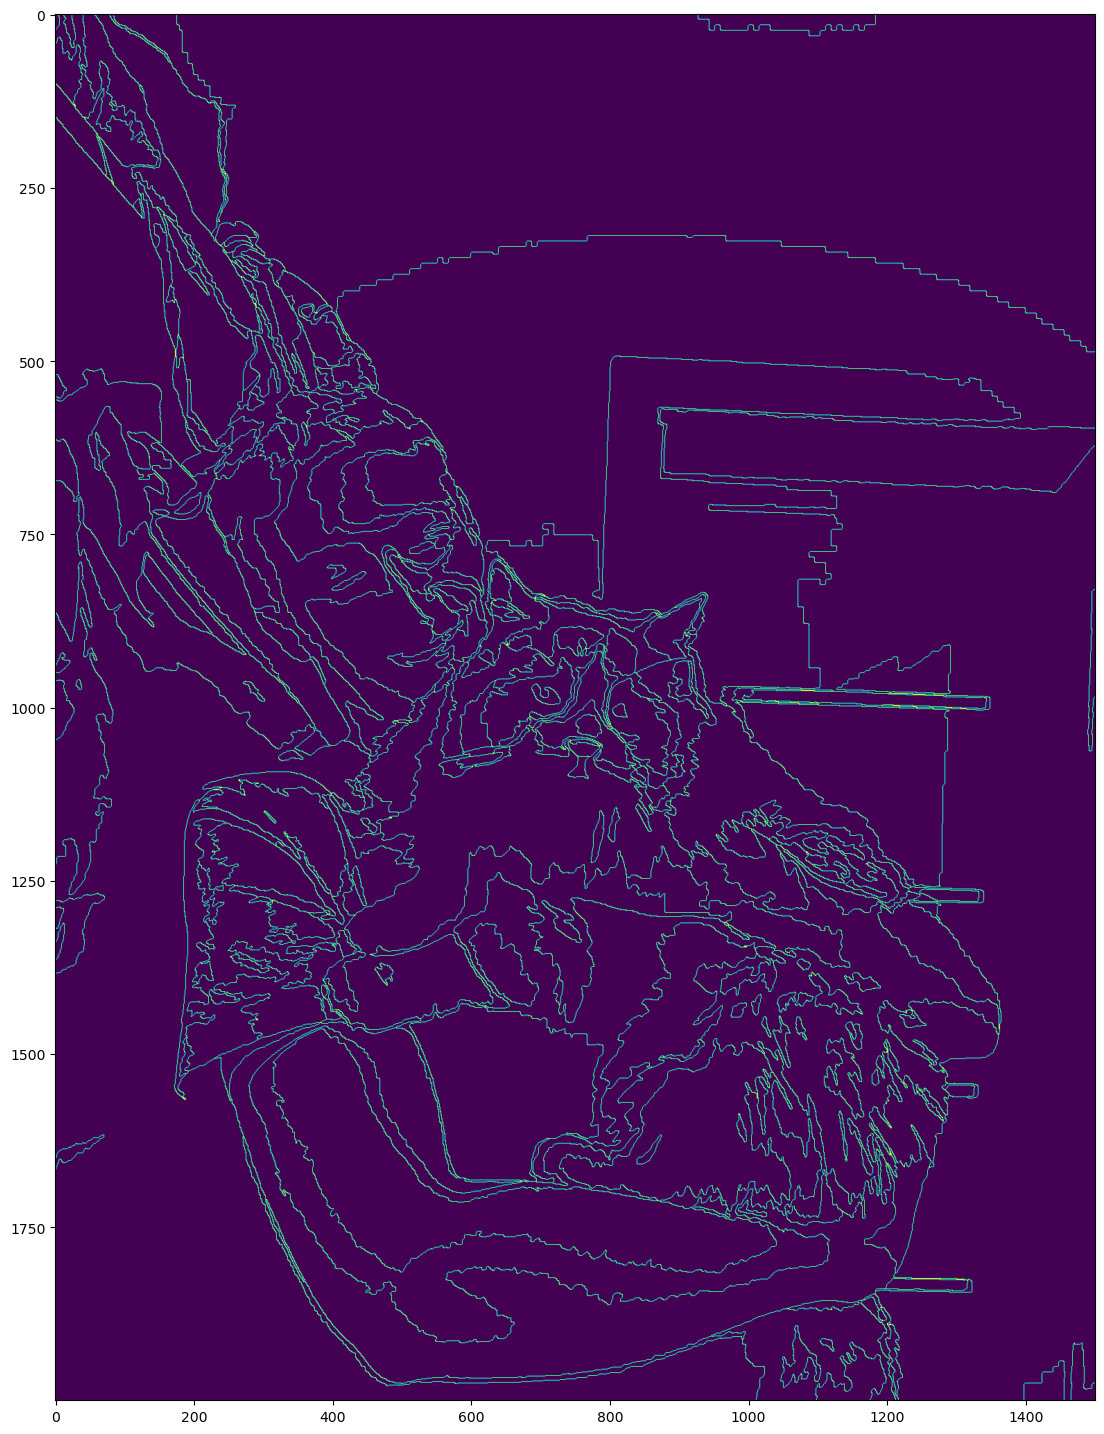

In [24]:
plt.figure(figsize=(32, 18))
plt.imshow(borders)
plt.show()

In [4]:
def return_colors(image):
    unique_colors = np.unique(image.reshape(-1, 3), axis=0)
    return unique_colors

In [5]:
colors = return_colors(result_image)

numpy.ndarray

In [7]:
mask = cv2.inRange(result_image, colors[0], colors[0])

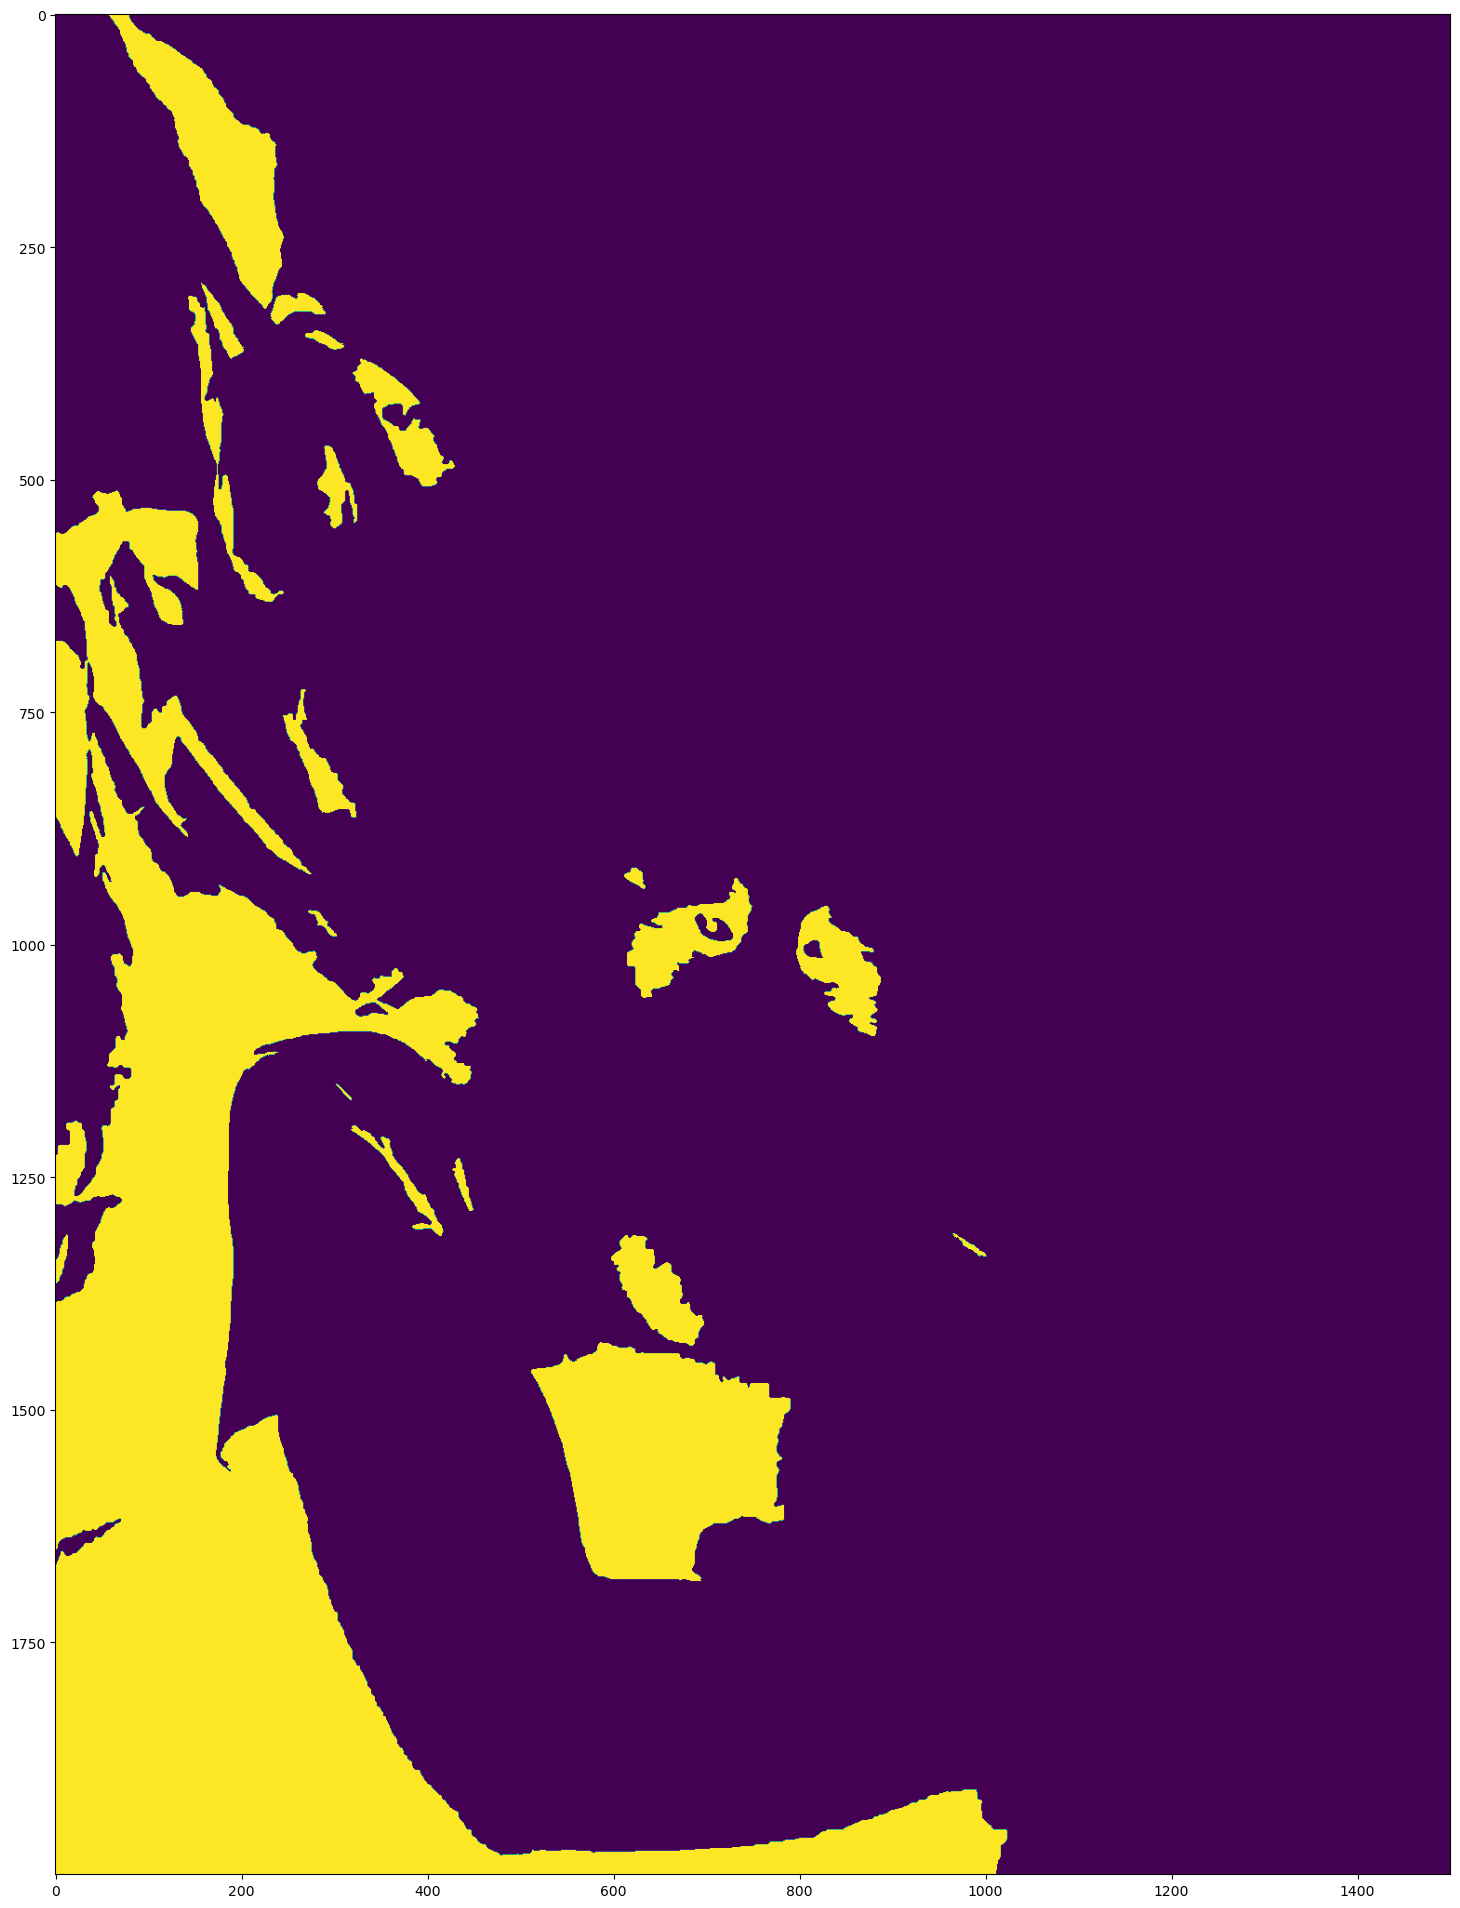

In [11]:
plt.figure(figsize=(18, 32))
plt.imshow(mask)

In [12]:
colored_output = cv2.bitwise_and(result_image, result_image, mask=mask)

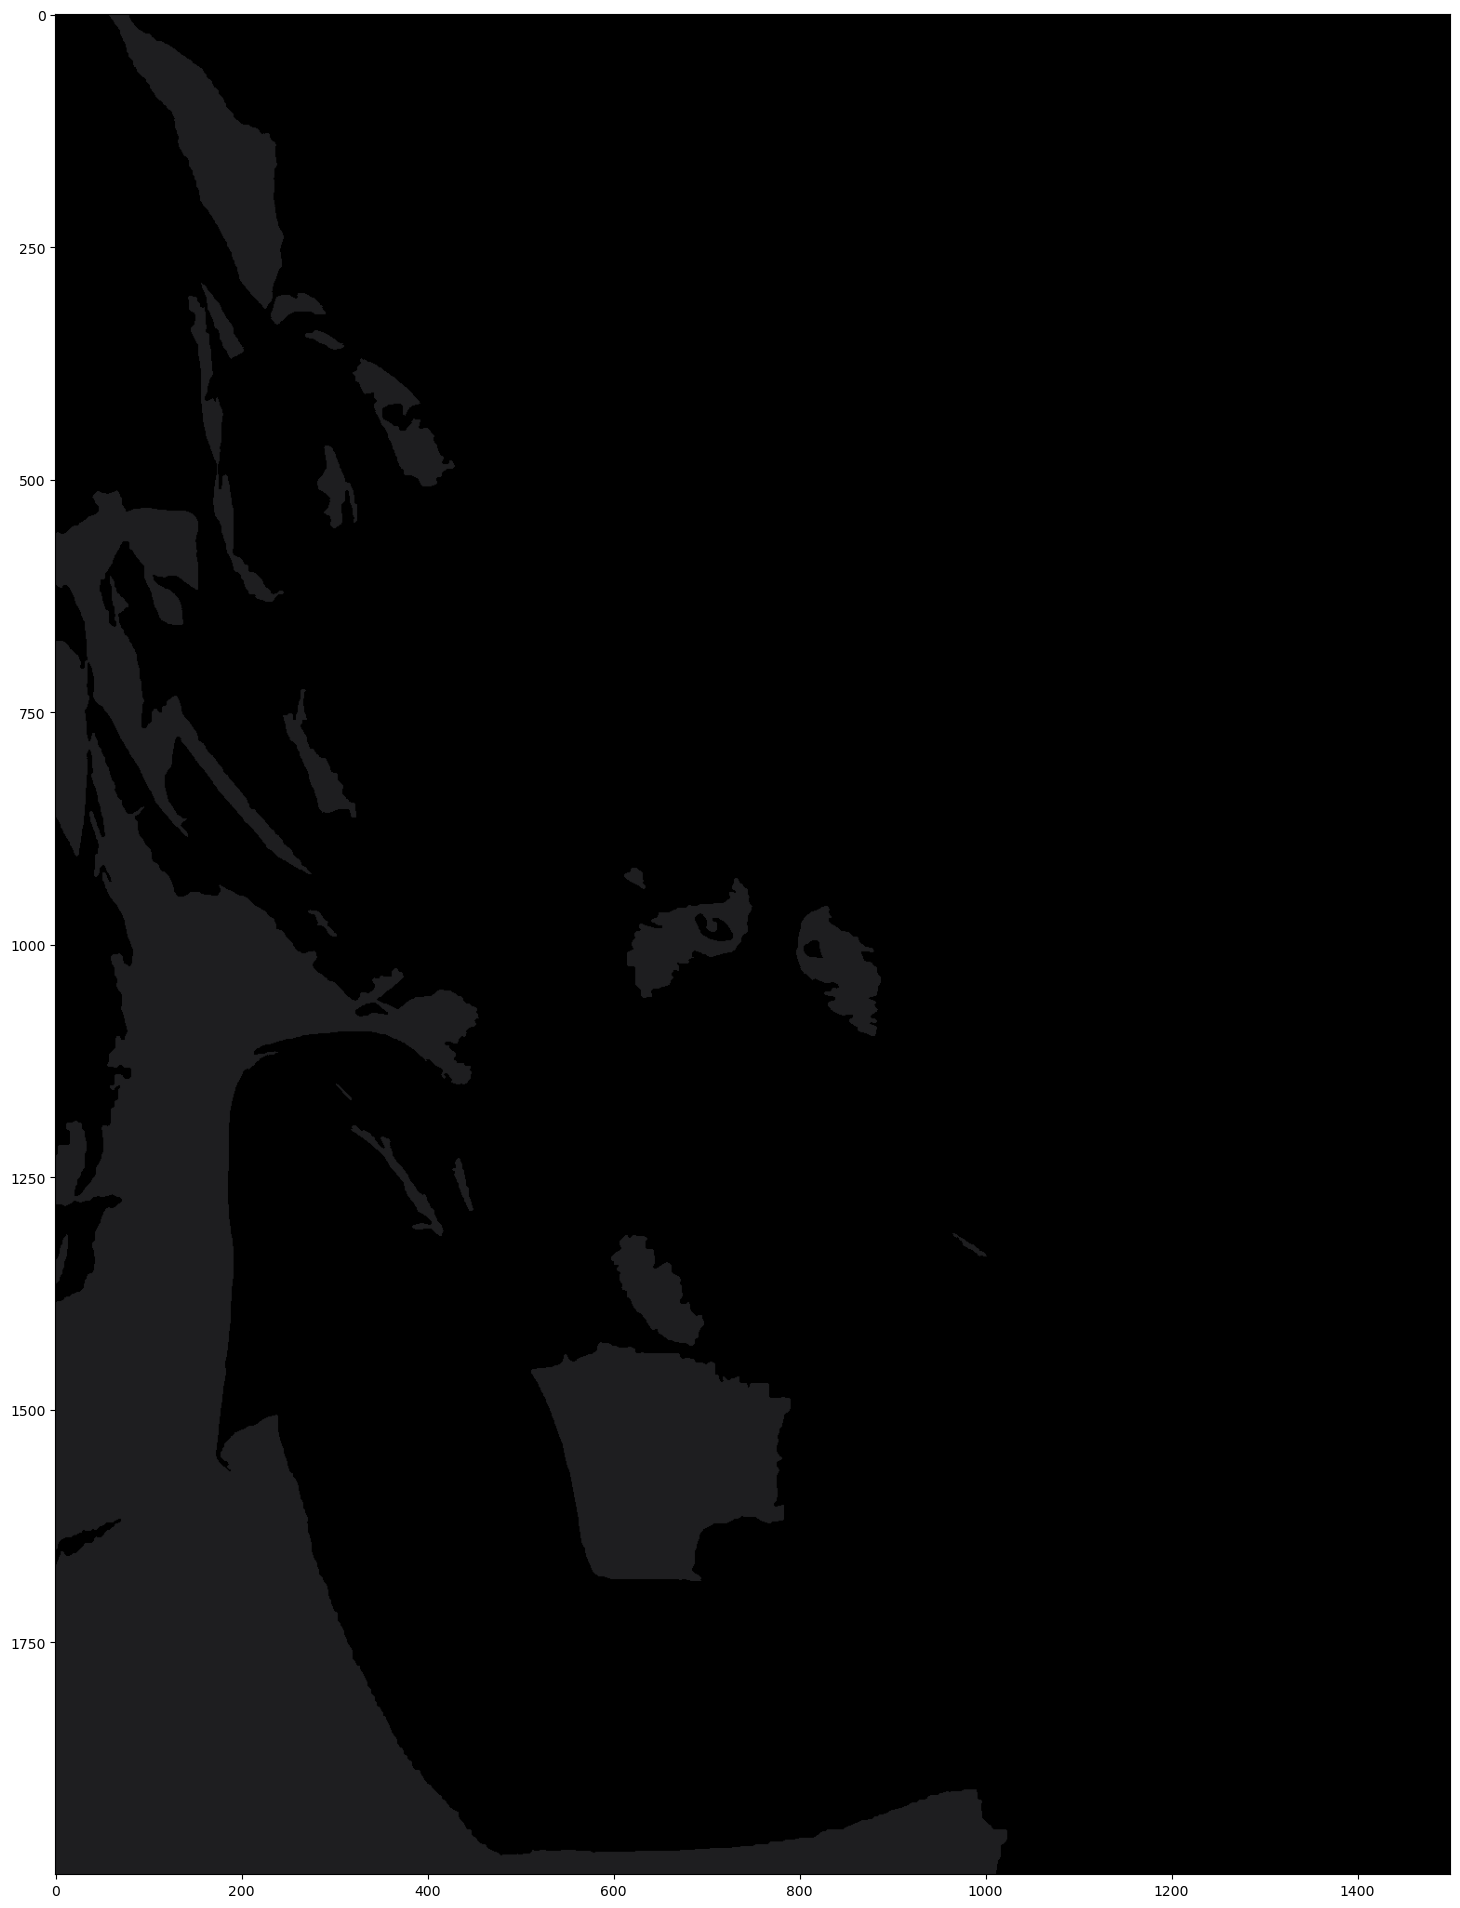

In [13]:
plt.figure(figsize=(18, 32))
plt.imshow(colored_output)

In [15]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

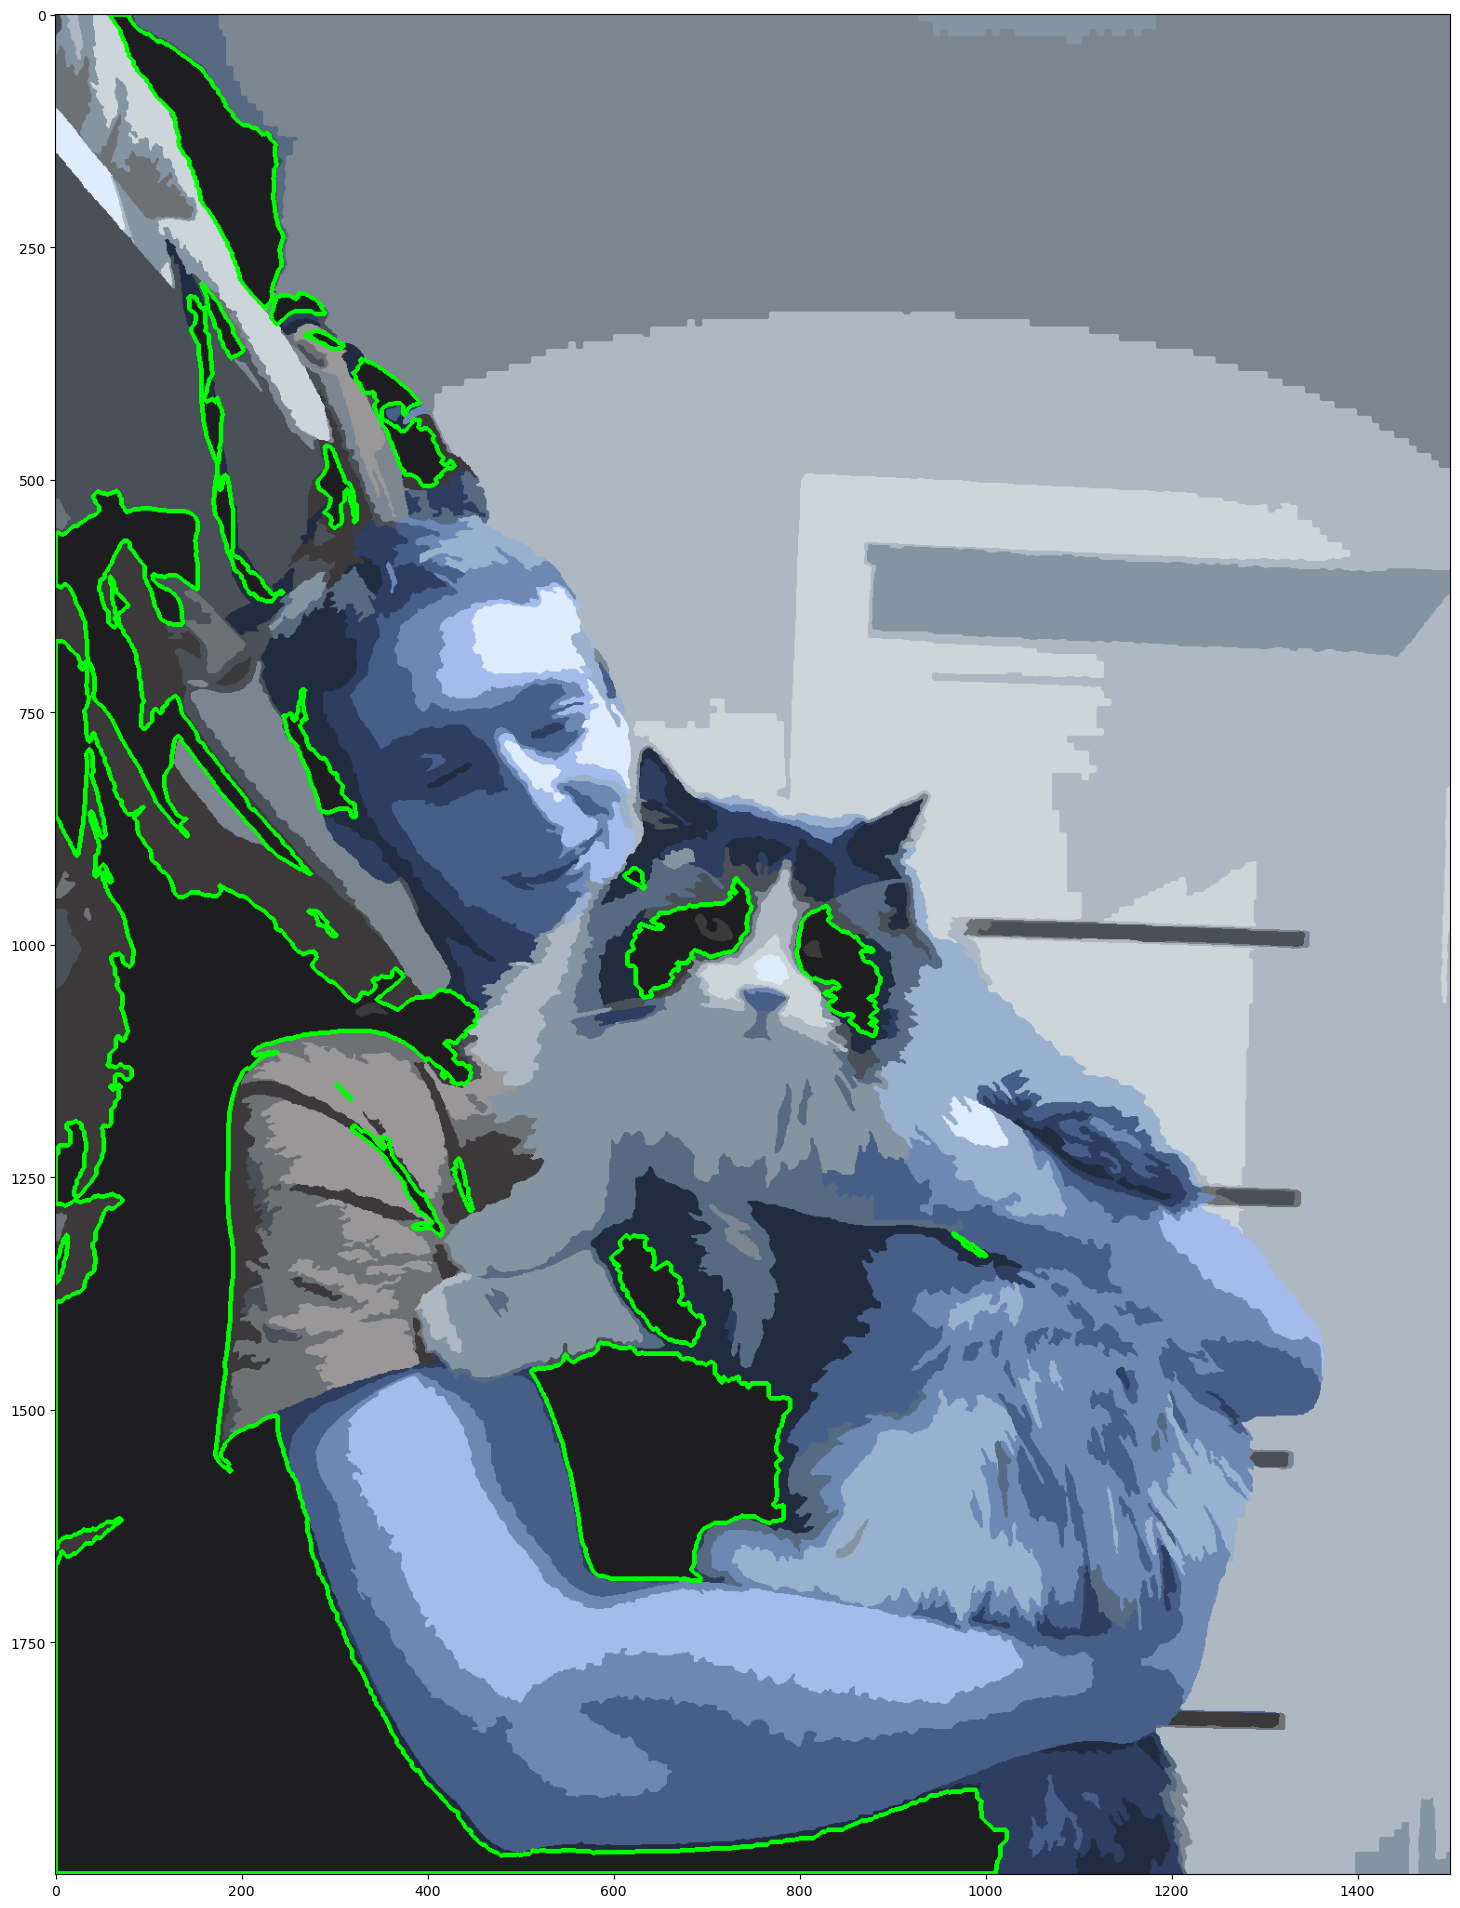

In [23]:
im = cv2.drawContours(result_image, contours, -1, (0, 255, 0), 3)
plt.figure(figsize=(18, 32))
plt.imshow(im)

In [ ]:
# Define the specific color you are looking for (in BGR)
target_color_bgr = colors[0]

# Create a mask that matches the target color exactly
mask = cv2.inRange(result_image, target_color_bgr, target_color_bgr)

# Optional: apply the mask to get the output with the colored areas
colored_output = cv2.bitwise_and(result_image, result_image, mask=mask)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image to visualize them
output_image = result_image.copy()
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 3)  # Draw contours in green


